# About log_data_to_sequence

This notebook creates minable sequences from log data given a predetermined translation of log actions to sequence actions.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils_timeline_viz
%aimport utils_read_parsing
from utils_timeline_viz import *
from utils_read_parsing import *
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 25, 15
from matplotlib.backends.backend_pdf import PdfPages
import os
import numpy as np
import pandas as pd
import getpass
import datetime
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None);pd.set_option('display.max_rows', None);pd.set_option('precision', 2)
# FOLDER =  'C:\\Users\\'+getpass.getuser()+'\\Documents\\Personal Content\\Lab_skills_study\\parsed log data'

# Preparing the data
We get all log files per student. They are stored in a dictionary like this:
```python
    log_files_per_sim = {'beers': {student1: [log_file_1.txt,log_file_2.txt], ...
                         'capacitor': {student1: [log_file_1.txt,log_file_2.txt], ...}
```

In [2]:
%aimport utils_read_parsing
log_files_per_sim = {}
for sim in ['beers','capacitor']:
    log_files_per_sim[sim] = get_parsed_log_files_per_student_for_sim(sim)

The file Sarah_beers_log_files_per_student.txt has been unpickled and loaded
The file Sarah_capacitor_log_files_per_student.txt has been unpickled and loaded


# Demo with one student
We are going to create the sequence for 1 student whose timeline visualization we have already visualized.

In [3]:
demo_student = 90447168
filename = find_student_log_file('beers',demo_student)
df = prep_parsing_data(filename) #removes model events, adds pauses with arbitrary threshold of 15s
df.head()

D:\Applications\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,User,Sim,Time,Index,User or Model,Component,Event,Item,Action,Laser toggle,Wavelength,Width,Concentration,Absorbance,Detector location,Ruler location,diff in parsed table,Table,X axis,Y axis,X axis scale,Y axis scale,Notes,Timeshifted,Duration,Family
0,90447168,beers-law-lab,3.06,572,user,sim,toggle laser,laser button,NaN,0.0,780.0,1.00,100.0,NaN,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.54,2.48,Vl
1,90447168,beers-law-lab,5.54,1131,user,sim,dragStarted,cuvetteNode,NaN,1.0,780.0,1.00,100.0,0.96,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.59,0.05,Vc
2,90447168,beers-law-lab,5.59,1136,user,sim,dragged,cuvetteNode,increasing,1.0,780.0,1.00,100.0,0.96,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.66,0.07,Vc
3,90447168,beers-law-lab,5.66,1145,user,sim,dragged,cuvetteNode,increasing,1.0,780.0,1.01,100.0,0.97,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.68,0.02,Vc
4,90447168,beers-law-lab,5.68,1148,user,sim,dragged,cuvetteNode,increasing,1.0,780.0,1.01,100.0,0.97,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.72,0.03,Vc


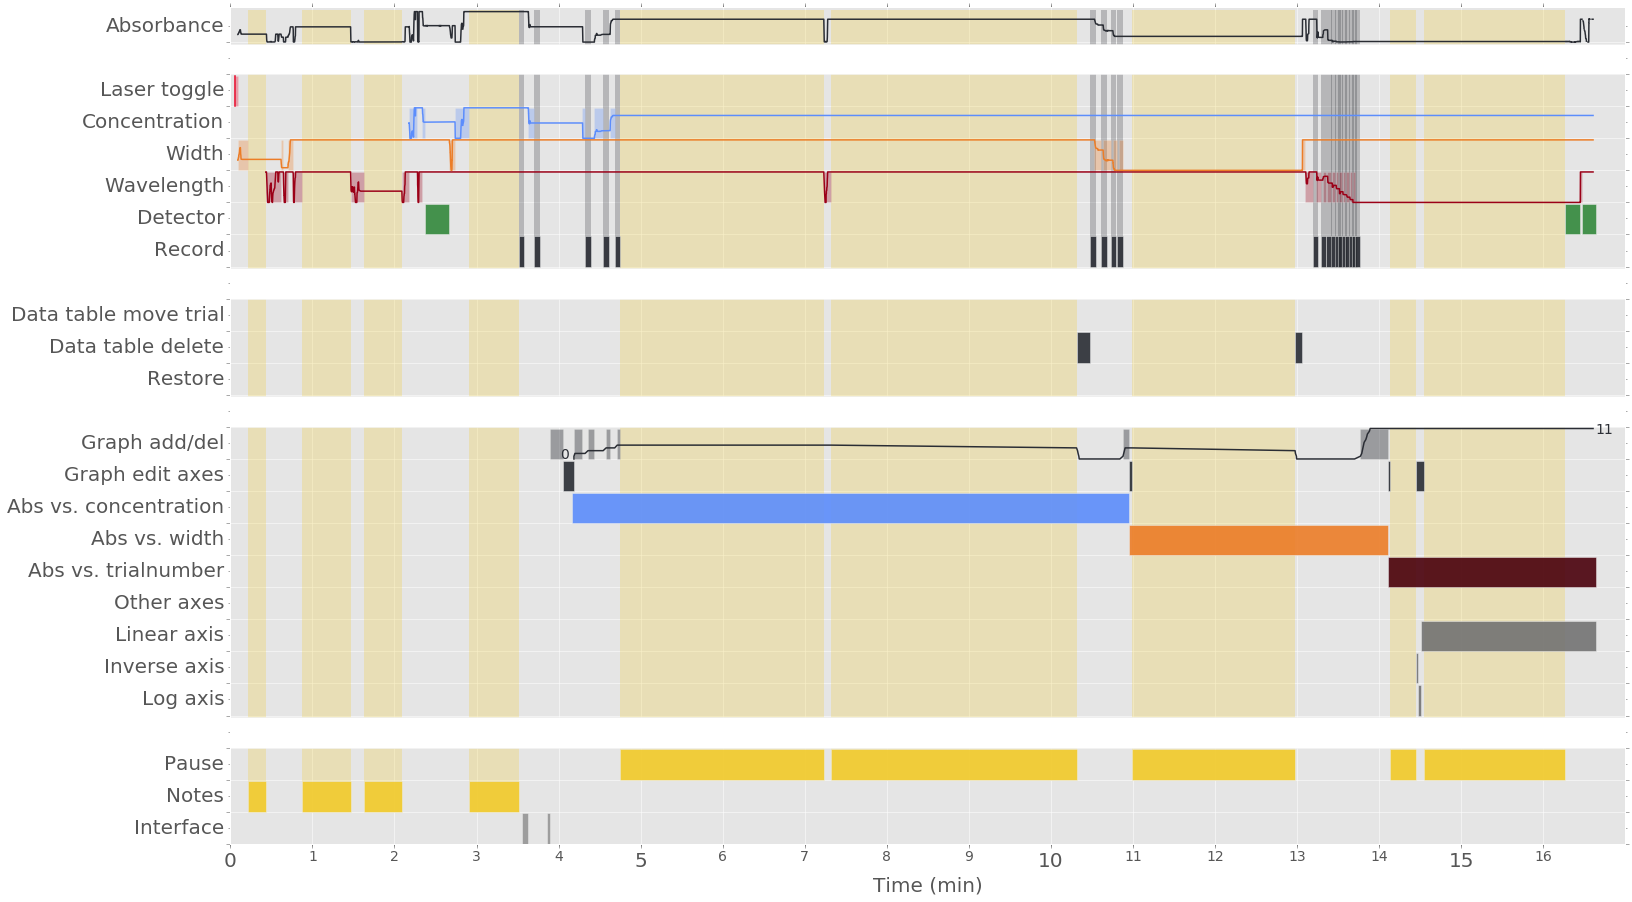

In [4]:
plot(df,to_plot_beers,family_name_to_code,function_to_use,colors)

## One by one, we convert them

In [5]:
rules = pd.read_csv('sequence_parsing_rules.txt', sep='\t')
rules

,Sequence Action,User,Sim,Time,Index,User.1,Component,Event,Item,Action,Laser toggle,Wavelength,Width,Concentration,Absorbance,Detector location,Ruler location,diff in parsed table,Table,X axis,Y axis,X axis scale,Y axis scale,Notes
0,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,Changed concentration,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,dragEnded,solutionControls,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,dragged,solutionControls,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,dragStarted,solutionControls,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,change_other,NaN,NaN,NaN,NaN,NaN,NaN,dragEnded,detectorNode,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,change_other,NaN,NaN,NaN,NaN,NaN,NaN,dragged,detectorNode,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,change_other,NaN,NaN,NaN,NaN,NaN,NaN,dragStarted,detectorNode,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,change_other,NaN,NaN,NaN,NaN,NaN,NaN,Changed concentration,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,change_other,NaN,NaN,NaN,NaN,NaN,NaN,dragEnded,solutionControls,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,change_other,NaN,NaN,NaN,NaN,NaN,NaN,dragEnded,detectorNode,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def converter(row):
    action = ''
#     print '\nrow'
    for i,rule in rules.iterrows():
        potential_action = rule['Sequence Action']
#         print potential_action
        rule.drop('Sequence Action',inplace=True)
        rule.dropna(inplace=True)
        rule_dict = rule.to_dict()
#         print rule_dict
        match=True
        for column,value in rule_dict.iteritems():
            if row[column]!= value:
                match=False
#                 print column,value, 'no match'
                break
        if match:
#             print 'match!!!'
            return potential_action
    return 'no_match_found'

In [7]:
df['Sequence Action'] = df.apply(converter, axis=1)

In [8]:
from itertools import groupby
sequence = [x[0] for x in groupby(df['Sequence Action'])]
sequence

['laser_on',
 'change_width',
 'pause',
 'change_wavelength',
 'change_width',
 'change_wavelength',
 'change_width',
 'change_wavelength',
 'pause',
 'change_wavelength',
 'pause',
 'change_wavelength',
 'change_concentration',
 'change_wavelength',
 'change_concentration',
 'change_other',
 'change_width',
 'change_concentration',
 'pause',
 'table_add',
 'ignore',
 'change_concentration',
 'table_add',
 'ignore',
 'graph_axis',
 'graph_add',
 'change_concentration',
 'table_add',
 'graph_add',
 'change_concentration',
 'table_add',
 'graph_add',
 'change_concentration',
 'table_add',
 'graph_add',
 'pause',
 'change_wavelength',
 'pause',
 'ignore',
 'table_add',
 'change_width',
 'table_add',
 'change_width',
 'table_add',
 'change_width',
 'table_add',
 'change_width',
 'graph_add',
 'graph_axis',
 'pause',
 'ignore',
 'change_width',
 'change_wavelength',
 'table_add',
 'change_wavelength',
 'table_add',
 'change_wavelength',
 'table_add',
 'change_wavelength',
 'table_add',
 'ch

# Trying to do for more students

In [9]:
ids = get_students_to_analyze_log()
N = len(ids)

In [10]:
rules = pd.read_csv('sequence_parsing_rules.txt', sep='\t')

In [12]:
for student in ids:
    filename = find_student_log_file('beers',student)
    df = prep_parsing_data(filename) #removes model events, adds pauses with arbitrary threshold of 15s
    print '\n\n',student
    df['Sequence Action'] = df.apply(converter, axis=1)
    print df[df['Sequence Action']=='no_match_found']



11612162
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


13660166
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


41947147
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequ

Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


10537160
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


18174154
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action



77047160
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


17655165
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


17868168
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequ

Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


22340167
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


11929166
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action



17597160
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []


18365162
Empty DataFrame
Columns: [User, Sim, Time, Index, User or Model, Component, Event, Item, Action, Laser toggle, Wavelength, Width, Concentration, Absorbance, Detector location, Ruler location, diff in parsed table, Table, X axis, Y axis, X axis scale, Y axis scale, Notes, Timeshifted, Duration, Family, Sequence Action]
Index: []
The parsed file has no user events, only model events. No dataframe prepared.


16317166


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

# to do

* remove 1 student from analysis
* deal with multiple log files